# TP2 - Ejercicio 2

This code implements the Particle Swarm Optimization (PSO) algorithm using the `pyswarm` library. The objective function, which can be customized, is minimized within a defined range of lower and upper limits for the variables. Upon executing the algorithm, the optimal coordinates and the minimum value of the objective function are obtained, thus facilitating the efficient and rapid resolution of optimization problems.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class Particle:
    def __init__(self, position, velocity):
        self.position = position
        self.velocity = velocity
        self.best_position = position.copy()
        self.best_value = np.inf

class PSO:
    def __init__(self, objective_function, num_particles, max_iterations, c1, c2, w, bounds):
        self.objective_function = objective_function
        self.num_particles = num_particles
        self.max_iterations = max_iterations
        self.c1 = c1
        self.c2 = c2
        self.w = w
        self.bounds = bounds
        self.particles = self.initialize_particles()
        self.global_best_position = None
        self.global_best_value = np.inf
        self.gbest_history = []

    def initialize_particles(self):
        positions = np.random.uniform(self.bounds[0], self.bounds[1], (self.num_particles, 2))
        velocities = np.zeros((self.num_particles, 2))
        return [Particle(pos, vel) for pos, vel in zip(positions, velocities)]

    def update_particles(self):
        for particle in self.particles:
            r1, r2 = np.random.rand(2)
            value = self.objective_function(particle.position)

            if value < particle.best_value:
                particle.best_value = value
                particle.best_position = particle.position.copy()

            if value < self.global_best_value:
                self.global_best_value = value
                self.global_best_position = particle.position.copy()

            particle.velocity = (self.w * particle.velocity +
                                 self.c1 * r1 * (particle.best_position - particle.position) +
                                 self.c2 * r2 * (self.global_best_position - particle.position))

            particle.position += particle.velocity
            particle.position = np.clip(particle.position, self.bounds[0], self.bounds[1])

        self.gbest_history.append(self.global_best_value)

    def optimize(self):
        for _ in range(self.max_iterations):
            self.update_particles()

        return self.global_best_position, self.global_best_value

def objective_function(xy):
    a = user_input_a
    b = user_input_b
    return (xy[0] - a) ** 2 + (xy[1] + b) ** 2

def plot_results(best_position, best_value, pso_instance):
    x = np.linspace(pso_instance.bounds[0], pso_instance.bounds[1], 100)
    y = np.linspace(pso_instance.bounds[0], pso_instance.bounds[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = objective_function(np.array([X, Y]))

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis')
    ax.scatter(best_position[0], best_position[1], best_value, color='red', s=100, label='Optimal Solution')
    ax.set_title('Objective Function f(x, y)')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    ax.legend()
    plt.show()

def plot_gbest_history(pso_instance):
    plt.figure()
    plt.plot(range(len(pso_instance.gbest_history)), pso_instance.gbest_history, color='orange', marker='o')
    plt.title('Global Best Value over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Global Best Value (gbest)')
    plt.grid()
    plt.show()

Optimal Solution (x, y): [ 30.38654285 -27.04189322] --- Optimal Value (f(x, y)): 4.31874331572478


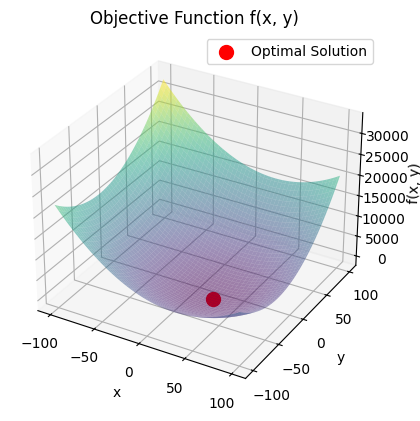

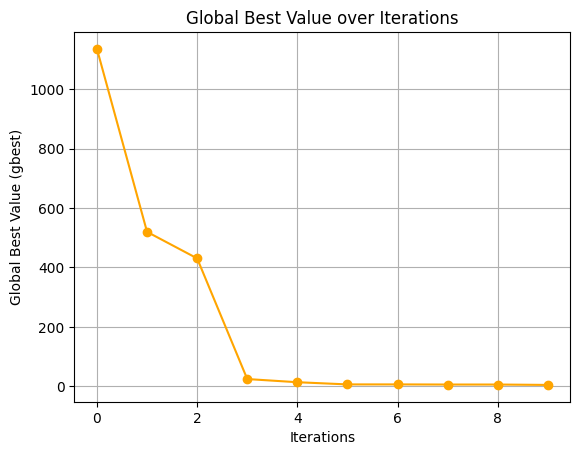

Optimal Solution with w=0 (x, y): [ 29.79595196 -24.85382075] --- Optimal Value: 0.06300397642559323


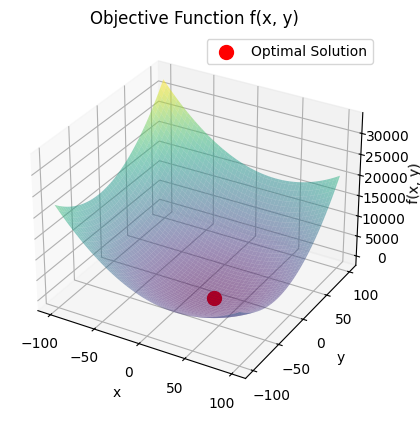

In [9]:
# User input for a and b
user_input_a = float(input("Enter value for a (-50 to 50): "))
user_input_b = float(input("Enter value for b (-50 to 50): "))

# PSO parameters
num_particles = 20
max_iterations = 10
c1 = 2
c2 = 2
w = 0.7
bounds = (-100, 100)

# Execute PSO
pso_instance = PSO(objective_function, num_particles, max_iterations, c1, c2, w, bounds)
best_position, best_value = pso_instance.optimize()
print(f'Optimal Solution (x, y): {best_position} --- Optimal Value (f(x, y)): {best_value}')

# Plot results
plot_results(best_position, best_value, pso_instance)
plot_gbest_history(pso_instance)

# Set inertia weight w to 0 and rerun the algorithm
w = 0
pso_instance_zero_inertia = PSO(objective_function, num_particles, max_iterations, c1, c2, w, bounds)
best_position_zero_inertia, best_value_zero_inertia = pso_instance_zero_inertia.optimize()
print(f'Optimal Solution with w=0 (x, y): {best_position_zero_inertia} --- Optimal Value: {best_value_zero_inertia}')

# Plot results with zero inertia
plot_results(best_position_zero_inertia, best_value_zero_inertia, pso_instance_zero_inertia)

In [15]:
from pyswarm import pso

def objective_function(x):
    return (x[0] - 30)**2 + (x[1] + 27)**2 + 4

lb = [-100, -100]  
ub = [100, 100]   

xopt, fopt = pso(objective_function, lb, ub)

print("Optimal solution (x, y):", xopt)
print("Optimal value (f(x, y)):", fopt)

Stopping search: Swarm best objective change less than 1e-08
Optimal solution (x, y): [ 30.00018206 -26.99986256]
Optimal value (f(x, y)): 4.000000052035346
